<a href="https://colab.research.google.com/github/IA1819/entregable2-lucabem/blob/master/EntrenandoAlModelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import warnings; warnings.simplefilter('ignore')

In [82]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample (4).csv
Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [0]:
import io
df_sample = pd.read_csv(io.BytesIO(uploaded['sample.csv']))
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Antes de emepezar a construir modelos, hacemos una serie de cambios en el dataset original para poder entrenarlo. Estos cambios son:

1. Cambiar el descriptor Prediction a entero
2. Cambiar el descriptor Gender a entero

In [0]:
df_train['Prediction'] = df_train['Prediction'].astype('int64')

In [85]:
d = {'Male' : 1, 'Female' : 0}
df_train['Gender'] = df_train['Gender'].map(d)
df_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Prediction
0,40,1,1.9,1.0,231,16,55,4.3,1.6,0.6,0
1,64,1,0.9,0.3,310,61,58,7.0,3.4,0.9,1
2,40,0,2.1,1.0,768,74,141,7.8,4.9,1.6,0
3,32,1,25.0,13.7,560,41,88,7.9,2.5,2.5,0
4,48,1,0.7,0.2,326,29,17,8.7,5.5,1.7,0


## Reduciendo la Dimensionalidad y Estandarizando Descriptores

Antes de ponernos a realizar modelos, vamos a reducir la dimensionalidad de nuestro dataset, para mejorar la precisión de nuestros modelos.

**Reduccion Dimensionalidad**

Como hemos visto en el anterior notebook, algunas variables tenian una fuerte correlaccion, era el caso de: 

    La Bilirrubina Directa depende de la Bilirrubina Total.

    La Albumina (es una proteina) depende de Proteína total.

    El Ratio de Albumina y Globulina depende como es logico de la Albumina.

In [0]:
df_train.drop(['Albumin_and_Globulin_Ratio'], axis=1, inplace=True)

In [0]:
X =  df_train.values[:,:-1]
Y =  df_train.values[:,-1]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

**Estandarizacion**

In [0]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(trainData)
X_test_std = stdsc.transform(testData)

## Entrenando distintos algoritmos y seleccionando los hiperparámetros

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

### Validación manual (holdout)

La primera alternativa para seleccionar los hiperparámetros consiste en reservar una parte de las instancias del training set para validación, y probar distintos hiperparámetros de manera manual para ver cuál es la mejor solución con cada uno de ellos. Para ello utilizamos de nuevo la función train_test_split.



In [0]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
                                                                test_size=0.1, random_state=84)

####**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1 y 25.

In [93]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=75.76%
k=3, precisión=72.73%
k=5, precisión=75.76%
k=7, precisión=69.70%
k=9, precisión=66.67%
k=11, precisión=72.73%
k=13, precisión=63.64%
k=15, precisión=69.70%
k=17, precisión=69.70%
k=19, precisión=69.70%
k=21, precisión=69.70%
k=23, precisión=72.73%
k=25, precisión=75.76%


Vemos que el mejor resultado para KNN es **k=[1, 5, 25]** con una precision del 75.76%


####**Árboles de decisión**

In [94]:
for k in range(2,31):
    modelArbol  = DecisionTreeClassifier(min_samples_split=k)
    modelArbol.fit(trainData, trainLabels)
    score = modelArbol .score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=75.76%
k=3, precisión=75.76%
k=4, precisión=66.67%
k=5, precisión=75.76%
k=6, precisión=63.64%
k=7, precisión=78.79%
k=8, precisión=78.79%
k=9, precisión=66.67%
k=10, precisión=69.70%
k=11, precisión=78.79%
k=12, precisión=75.76%
k=13, precisión=75.76%
k=14, precisión=72.73%
k=15, precisión=72.73%
k=16, precisión=72.73%
k=17, precisión=72.73%
k=18, precisión=69.70%
k=19, precisión=66.67%
k=20, precisión=69.70%
k=21, precisión=69.70%
k=22, precisión=72.73%
k=23, precisión=72.73%
k=24, precisión=69.70%
k=25, precisión=72.73%
k=26, precisión=72.73%
k=27, precisión=72.73%
k=28, precisión=69.70%
k=29, precisión=72.73%
k=30, precisión=72.73%


El mejor **n_samples_split=[8] co un 78.82%**

Una ventaja de los árboles de decisión es que podemos ver el proceso de clasificación, es decir, es un algoritmo de caja blanca.

Para ello realizamos los siguientes pasos.

In [0]:
 modelArbol  = DecisionTreeClassifier(min_samples_split=8)

In [96]:
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(modelArbol,out_file='tree.dot')

In [0]:
!dot -Tpng tree.dot -o tree.png

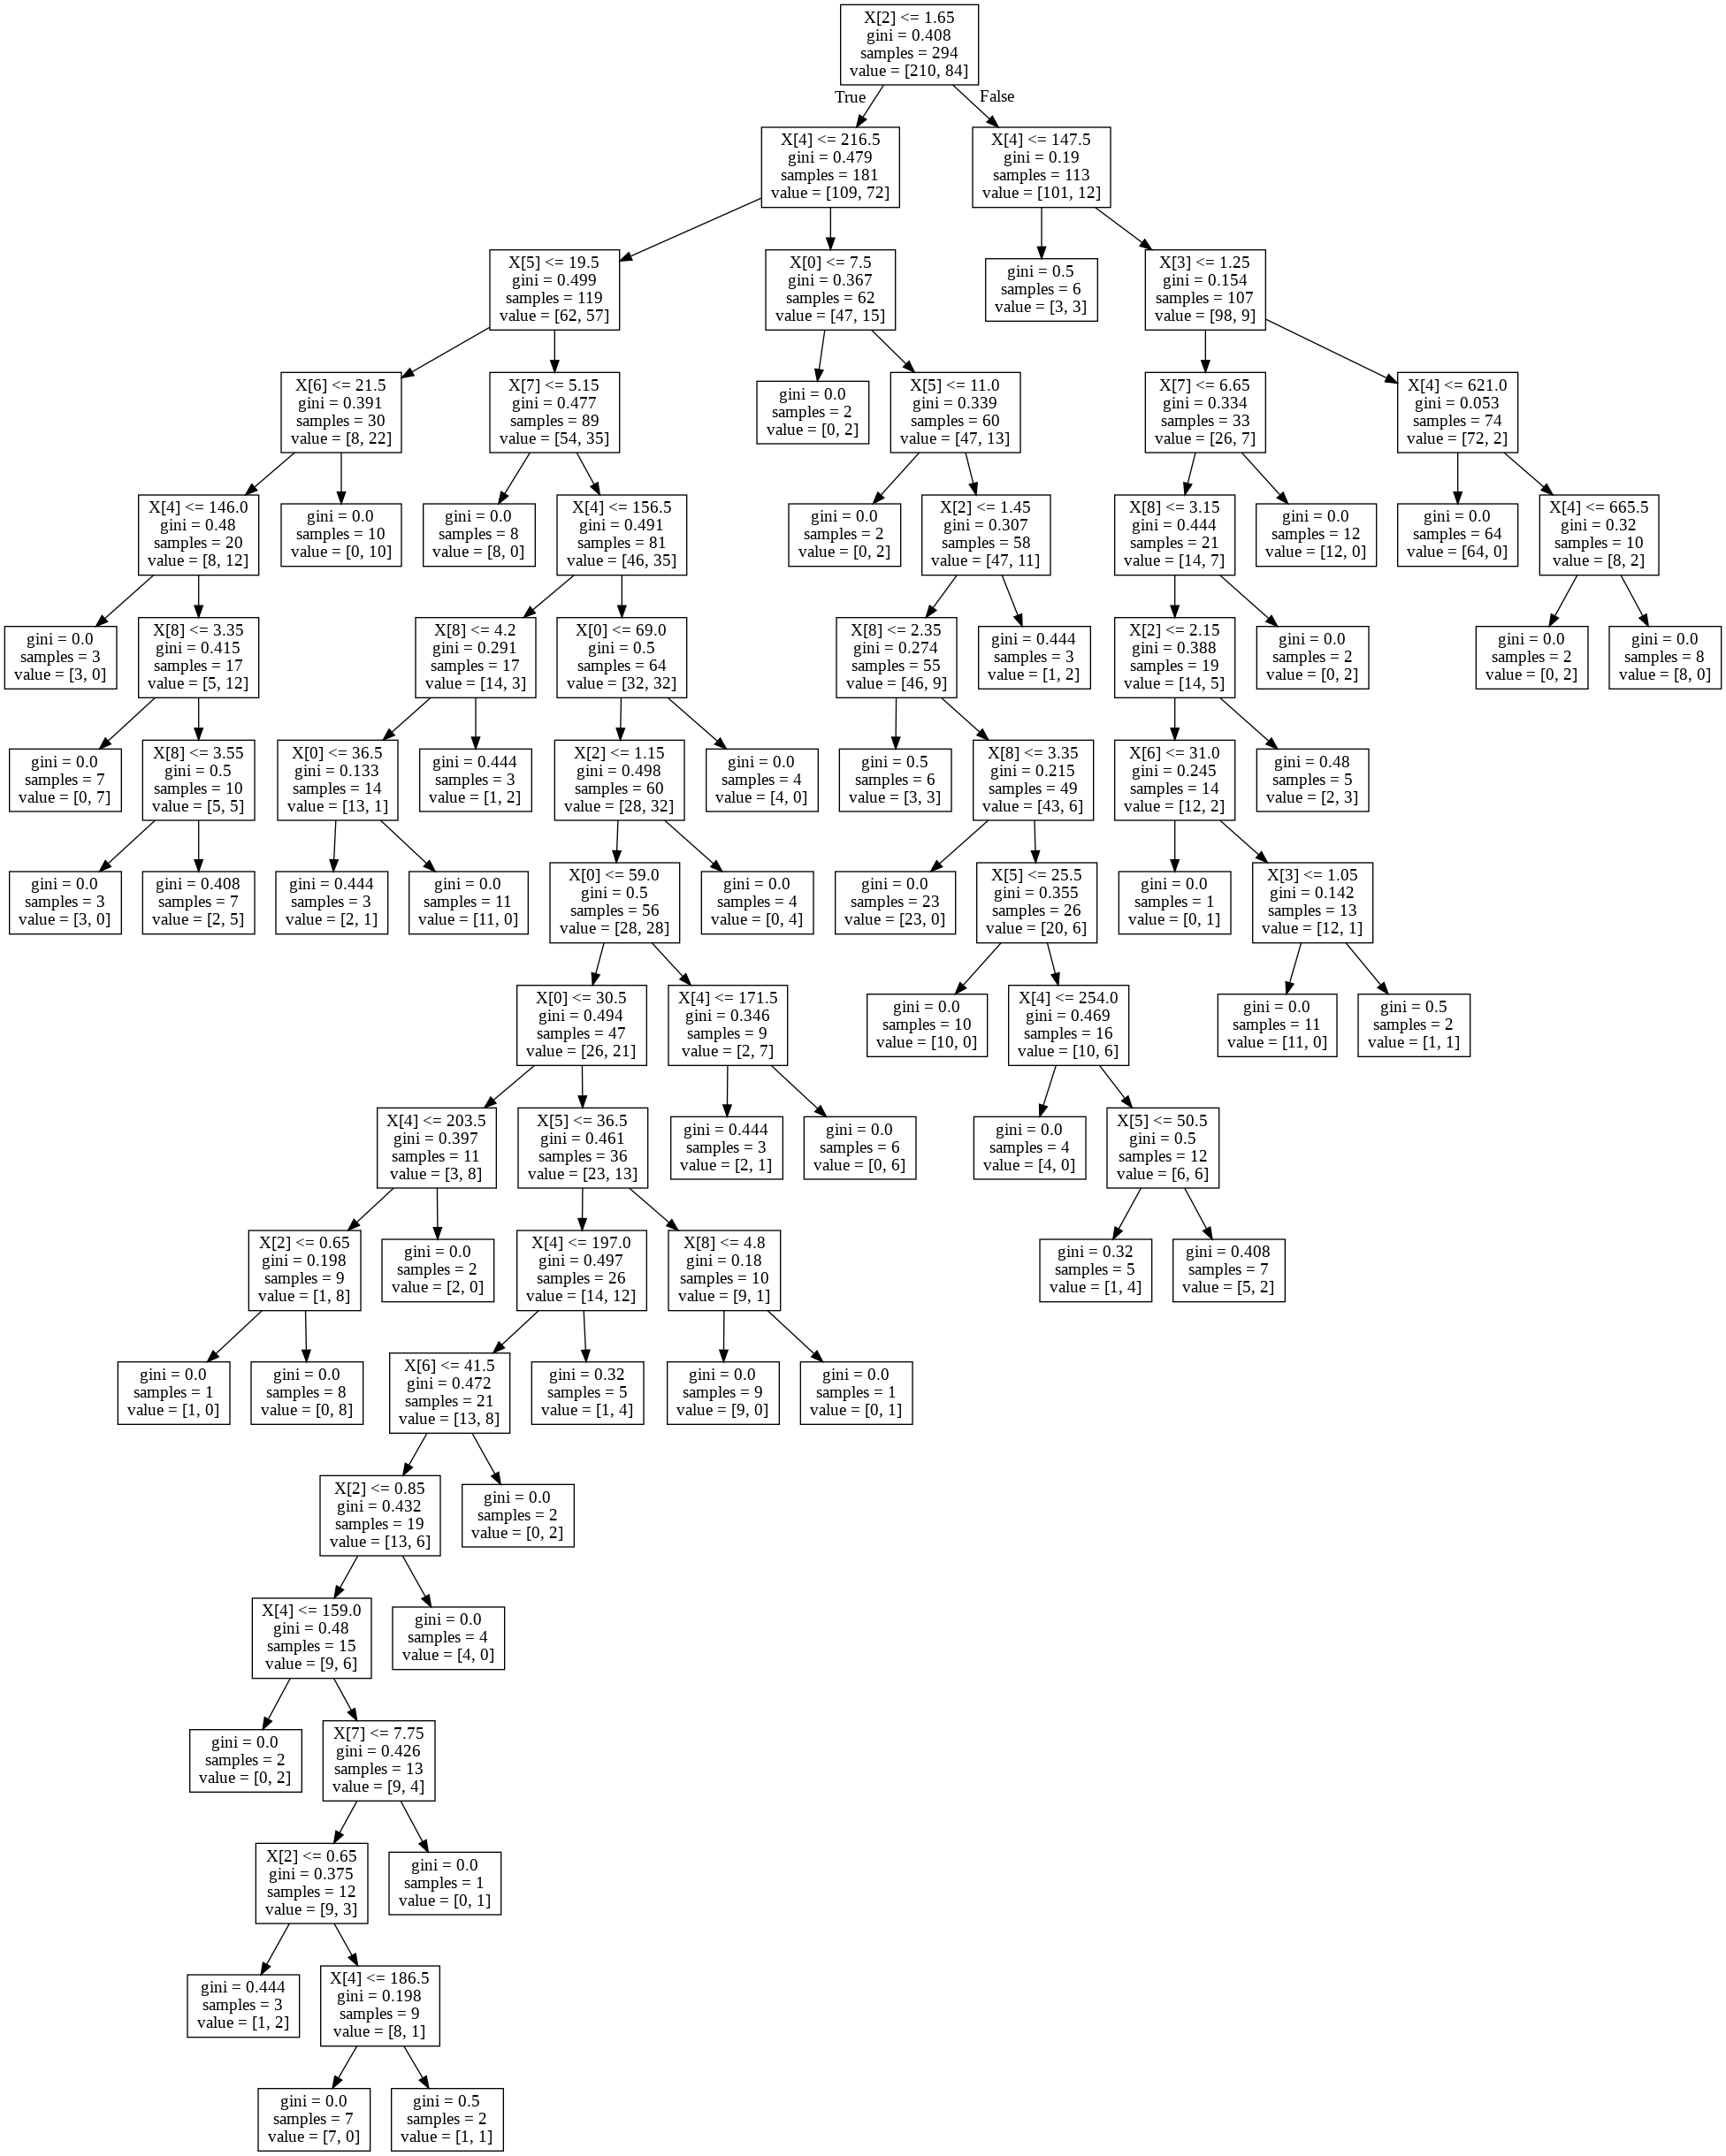

In [99]:
from IPython.display import Image
Image("tree.png")

####**Regresión logística**

Para este modelo vamos a probar con distintos valores del hiperparámetro *C*. 
Regresión logística con C tomando los valores 0.1,1,10,100, y 1000. 


In [100]:
for k in (0.1, 1, 10, 100, 1000):
    modelLR   = LogisticRegression(C=k)
    modelLR.fit(trainData, trainLabels)
    score = modelLR.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=0, precisión=72.73%
k=1, precisión=69.70%
k=10, precisión=69.70%
k=100, precisión=69.70%
k=1000, precisión=69.70%


In [101]:
modelLR   = LogisticRegression(C=0.1)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
score = modelLR.score(valData,valLabels)
print("precisión=%.2f%%" % ( score * 100))

precisión=72.73%


####**SVM**

En este caso veremos como utilizar el SVM con un kernel lineal. La idea intuitiva del metodo del kernel es aumentar la dimension de los datos, para ver si son linealmente separables.

In [103]:
modelSVMLineal = SVC(kernel="linear")
modelSVMLineal.fit(trainData, trainLabels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Una vez entrenado el modelo, vemos cual es la puntuación obtenida sobre el conjunto de validacion.

In [104]:
score = modelSVMLineal.score(valData,valLabels)
print("precisión=%.2f%%" % ( score * 100))

precisión=69.70%


####**Redes Neuronales**

Esta primera red neuronal es muy sencilla, con una unica capa.

In [105]:
modelPerceptron = Perceptron(n_iter=10,eta0=1.0,random_state=84)
modelPerceptron.fit(trainData,trainLabels)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=10, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=84, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
score = modelPerceptron.score(valData,valLabels)
print("precisión=%.2f%%" % (score * 100))

precisión=69.70%



Veámos como construir un Perceptron multicapa con dos capas ocultas, la primera con 5 unidades y la segunda con 2 unidades, con ratio de aprendizaje 0.01, momento 0.9.

In [107]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
modelMultiLayerPerceptron.fit(trainData,trainLabels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [108]:
score = modelMultiLayerPerceptron.score(valData,valLabels)
print("precisión=%.2f%%" % (score * 100))

precisión=69.70%


#### Resumen de Modelos

Antes de comprobar otras formas de buscar parametros vamos a hacer un breve resumen de qué modelo esta siendo mejor.

Para ello nos definimos la siguiente función.

In [0]:
def evalua(clasificador,testData,testLabels):
  contador = 0
  for i in range(0,len(testData)):
    if clasificador.predict([testData[i]]) == testLabels[i]:
      contador = contador+1
  return contador

Aplicamos los cambios hechos en el conjunto de entrenamiento al conjunto de test.

**Para Knn** habiamos visto k=5 era la mejor

In [110]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
print("Precision de Knn con k=5 ->", evalua(modelKNN, testData, testLabels)/len(testData)*100)

Precision de Knn con k=5 -> 66.36363636363637


**Para Arbol de Decision** hemos visto que n_samples_split=[12, 14, 15]

In [112]:
modelArbol  = DecisionTreeClassifier(min_samples_split=8)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
print("Precision de Arbol con n_samples:split=12 ->", evalua(modelArbol, testData, testLabels)/len(testData)*100)

Precision de Arbol con n_samples:split=12 -> 59.09090909090909


**Para SVM** con kernel lineal

In [114]:
modelSVMLineal = SVC(kernel="linear")
modelSVMLineal.fit(trainData, trainLabels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [115]:
print("Precision de SVM con kernel lineal ->", evalua(modelSVMLineal, testData, testLabels)/len(testData)*100)

Precision de SVM con kernel lineal -> 70.0


**Para Regresion Logistica** hemos visto que C=0.1

In [116]:
modelLR   = LogisticRegression(C=0.1)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
print("Precision de Regresion Lineal con C=1000 ->", evalua(modelLR, testData, testLabels)/len(testData)*100)

Precision de Regresion Lineal con C=1000 -> 69.0909090909091


**Para Perceptron** hemos conseguido  69.70%

In [118]:
print("Precision de Perceptron ->", evalua(modelPerceptron, testData, testLabels)/len(testData)*100)

Precision de Perceptron -> 70.0


**Para Multicapa** hemos conseguido  69.70%

In [119]:
print("Precision de Perceptron ->", evalua(modelMultiLayerPerceptron, testData, testLabels)/len(testData)*100)

Precision de Perceptron -> 70.0


### Utilizacion GridSearch Method

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

#### SVM

In [0]:
modelSVM = SVC()

In [0]:
tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [2, 3],
                     'C': [0.1,1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [0]:
scores = ['precision', 'recall']

In [0]:
#gridsearch(modelSVM,tuned_parameters,scores,5)

#### KNN

In [0]:
knnModel = KNeighborsClassifier()

In [0]:
tuned_parameters = {'n_neighbors':[1,5,25],
                    'leaf_size':[1,3,5],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'n_jobs':[-1]}

In [128]:
gridsearch(knnModel,tuned_parameters,scores,5)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 1}

Grid scores on development set:

0.627 (+/-0.104) for {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 1}
0.571 (+/-0.099) for {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5}
0.589 (+/-0.340) for {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 25}
0.627 (+/-0.104) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 1}
0.571 (+/-0.099) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 5}
0.589 (+/-0.340) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'n_neighbors': 25}
0.627 (+/-0.104) for {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 1}
0.571 (+/-0.099) for {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 5}
0.589 (+/-0.340) for {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_ne

In [163]:
KNNMejor = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs=-1, n_neighbors=5)
KNNMejor.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [164]:
evalua(KNNMejor, testData, testLabels)/(len(testData))*100

66.36363636363637

#### Regresion Logistica

In [0]:
logreg=LogisticRegression()

In [0]:
grid={'C': [0.1,0.5,1, 10, 100, 1000], "penalty":["l1","l2"]}

In [149]:
gridsearch(logreg,grid,scores,5)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'penalty': 'l2'}

Grid scores on development set:

0.356 (+/-0.009) for {'C': 0.1, 'penalty': 'l1'}
0.704 (+/-0.327) for {'C': 0.1, 'penalty': 'l2'}
0.686 (+/-0.389) for {'C': 0.5, 'penalty': 'l1'}
0.672 (+/-0.346) for {'C': 0.5, 'penalty': 'l2'}
0.679 (+/-0.335) for {'C': 1, 'penalty': 'l1'}
0.632 (+/-0.271) for {'C': 1, 'penalty': 'l2'}
0.682 (+/-0.193) for {'C': 10, 'penalty': 'l1'}
0.708 (+/-0.187) for {'C': 10, 'penalty': 'l2'}
0.674 (+/-0.205) for {'C': 100, 'penalty': 'l1'}
0.677 (+/-0.202) for {'C': 100, 'penalty': 'l2'}
0.674 (+/-0.205) for {'C': 1000, 'penalty': 'l1'}
0.728 (+/-0.243) for {'C': 1000, 'penalty': 'l2'}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1000, 'penalty': 'l2'}

Grid scores on development set:

0.493 (+/-0.029) for {'C': 0.1, 'penalty': 'l1'}
0.525 (+/-0.068) for {'C': 0.1, 'penalty': 'l2'}
0.519 (+/-0.088) f

In [0]:
mejorLog = LogisticRegression(C=1000, penalty='l2')

In [151]:
mejorLog.fit(trainData, trainLabels)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
evalevalua(mejorLog, testData, testLabels)/len(testData)

0.7181818181818181

#### Arbol de Decision

In [0]:
arbolModel = DecisionTreeClassifier()

In [0]:
tree_para = {'criterion':['gini','entropy'], 'min_samples_split': [8]}

In [155]:
gridsearch(arbolModel, tree_para,scores, 5)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'entropy', 'min_samples_split': 8}

Grid scores on development set:

0.504 (+/-0.129) for {'criterion': 'gini', 'min_samples_split': 8}
0.526 (+/-0.092) for {'criterion': 'entropy', 'min_samples_split': 8}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'criterion': 'entropy', 'min_samples_split': 8}

Grid scores on development set:

0.493 (+/-0.149) for {'criterion': 'gini', 'min_samples_split': 8}
0.524 (+/-0.111) for {'criterion': 'entropy', 'min_samples_split': 8}



### Analisis


In [156]:
!pip install StatisticalAnalysis

In [0]:
from StatisticalAnalysis import compare_methods
from scipy.stats import randint as sp_randint

In [0]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000], "penalty":["l1","l2"]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

In [0]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

In [0]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]


In [0]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.565317 (0.077787)
SVM: 0.513258 (0.026477)
KNN: 0.525836 (0.074772)
LR: 0.503908 (0.028193)
MLP: 0.535866 (0.043240)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.936153, p:0.009517
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.056511, p:0.026024
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

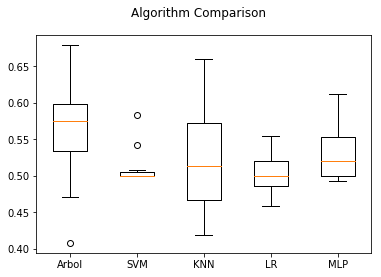

In [162]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')